# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

drug_results_df = pd.merge(mouse_metadata, study_results, how = "right", on = "Mouse ID")
drug_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.

mouse_count = len(drug_results_df["Mouse ID"].unique())
mouse_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
 
duplicate_mice_ID = drug_results_df.loc[drug_results_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_ID
                                                                       

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_ID_df = drug_results_df.loc[drug_results_df["Mouse ID"] == "g989", :]
duplicate_mice_ID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = drug_results_df[drug_results_df["Mouse ID"].isin(duplicate_mice_ID) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped_by_volume = clean_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

vmean = grouped_by_volume["Tumor Volume (mm3)"].mean()

vmedian = grouped_by_volume["Tumor Volume (mm3)"].median()

vvar = grouped_by_volume["Tumor Volume (mm3)"].var()

vstd = grouped_by_volume["Tumor Volume (mm3)"].std()

vsem = grouped_by_volume["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_table = pd.DataFrame({"Mean Tumore Volume":vmean,
                              "Median Tumor Volume": vmedian,
                              "Tumor Volume Variance": vvar,
                              "Tumor Volume Std. Dev.": vstd,
                              "Tumor Volume Std Err.": vsem

})
summary_table

,Mean Tumore Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregate_summary_table = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
aggregate_summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

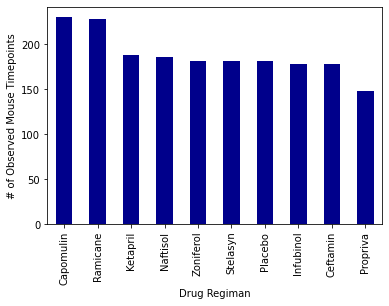

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

plot_pandas = clean_df["Drug Regimen"].value_counts().plot.bar(color = "darkblue")
plt.xlabel("Drug Regiman")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

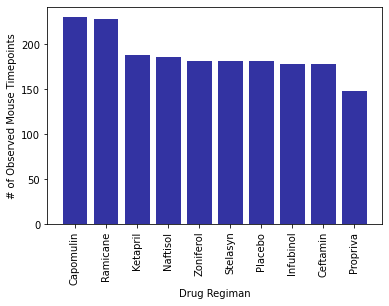

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = clean_df["Drug Regimen"].value_counts().index.values
y_axis = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis, color = "darkblue", alpha = 0.8, align = "center")

plt.xlabel("Drug Regiman")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")

plt.show()

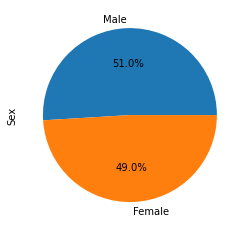

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()


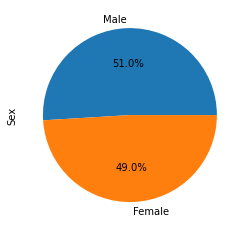

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
plt.pie(gender_data, labels = labels, autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest) timepoint for each mouse

last_time_df = clean_df.sort_values(["Mouse ID","Timepoint"], ascending= False).drop_duplicates(subset = "Mouse ID") 
last_time_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_time_merged_df = pd.merge(last_time_df, clean_df)
last_time_merged_df.sort_values(["Drug Regimen"], ascending = True)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
123,m957,Capomulin,Female,3,19,45,33.329098,1
181,g316,Capomulin,Female,22,22,45,40.159220,2
27,w914,Capomulin,Male,24,21,45,36.041047,2
167,i557,Capomulin,Female,1,24,45,47.685963,1
164,i738,Capomulin,Female,23,20,45,37.311846,2
...,...,...,...,...,...,...,...,...
188,f545,Zoniferol,Female,20,26,45,73.324432,1
217,c302,Zoniferol,Female,10,29,45,64.575222,4
158,j365,Zoniferol,Male,24,28,45,64.294085,2
232,a788,Zoniferol,Male,5,30,30,60.413709,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

cap_volume = []
ram_volume = []
inf_volume = []
cef_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for i in range(len(last_time_merged_df)-1):
    if last_time_merged_df.loc[i, "Drug Regimen"] == "Capomulin":
        cap_volume.append(last_time_merged_df.loc[i, "Tumor Volume (mm3)"])
    if last_time_merged_df.loc[i, "Drug Regimen"] == "Ramicane":
        ram_volume.append(last_time_merged_df.loc[i, "Tumor Volume (mm3)"])    
    if last_time_merged_df.loc[i, "Drug Regimen"] == "Infubinol":
        inf_volume.append(last_time_merged_df.loc[i, "Tumor Volume (mm3)"])
    if last_time_merged_df.loc[i, "Drug Regimen"] == "Ceftamin":
        cef_volume.append(last_time_merged_df.loc[i, "Tumor Volume (mm3)"])

total_tumor_volume = [cap_volume, ram_volume, inf_volume, cef_volume]
    
    # add subset 
        
outliers = []
for i in range(len(total_tumor_volume)):
    quartiles = pd.Series(total_tumor_volume[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume (mm3) is: {lowerq}.")
    print(f"The upper quartile of tumor volume is (mm3) is: {upperq}.")
    print(f"The interquartile range of tumor volume (mm3) is: {iqr}.")
    print(f"The median of tumor volume (mm3) is: {quartiles[0.5]}.")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} (mm3) could be outliers.")
    print(f"Values above {upper_bound} (mm3) could be outliers.")

    # Determine outliers using upper and lower bounds

    for j in range(len(total_tumor_volume[i])):
        if (total_tumor_volume[i][j] < lower_bound) or (total_tumor_volume[i][j] > upper_bound):
            outliers.append(total_tumor_volume[i][j])
            #current_outlier = total_tumor_volume[i][j]
            #outliers.a
            print(f"The outliers are {outliers} in (mm3)")



Capomulin:
The lower quartile of tumor volume (mm3) is: 32.37735684.
The upper quartile of tumor volume is (mm3) is: 40.1592203.
The interquartile range of tumor volume (mm3) is: 7.781863460000004.
The median of tumor volume (mm3) is: 38.1251644.
Values below 20.70456164999999 (mm3) could be outliers.
Values above 51.83201549 (mm3) could be outliers.

Ramicane:
The lower quartile of tumor volume (mm3) is: 31.56046955.
The upper quartile of tumor volume is (mm3) is: 40.65900627.
The interquartile range of tumor volume (mm3) is: 9.098536719999998.
The median of tumor volume (mm3) is: 36.56165229.
Values below 17.912664470000003 (mm3) could be outliers.
Values above 54.30681135 (mm3) could be outliers.

Infubinol:
The lower quartile of tumor volume (mm3) is: 53.422063412499995.
The upper quartile of tumor volume is (mm3) is: 63.44727427.
The interquartile range of tumor volume (mm3) is: 10.025210857500007.
The median of tumor volume (mm3) is: 59.216811469999996.
Values below 38.384247126

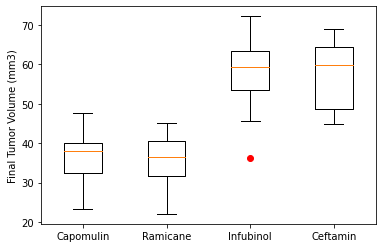

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
                  
fig, ax = plt.subplots()

ax.boxplot(total_tumor_volume, sym= "r")

ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xticklabels(treatments)

plt.show()


## Line and Scatter Plots

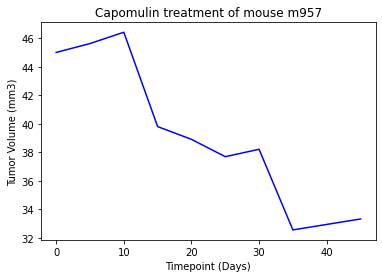

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#last_time_merged_df.loc[last_time_merged_df["Drug Regimen"] == "Capomulin"].head()

mouse_m957 = drug_results_df.loc[drug_results_df["Mouse ID"] == "m957"]

plt.plot(mouse_m957["Timepoint"], mouse_m957["Tumor Volume (mm3)"], color = "blue")

plt.title("Capomulin treatment of mouse m957")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

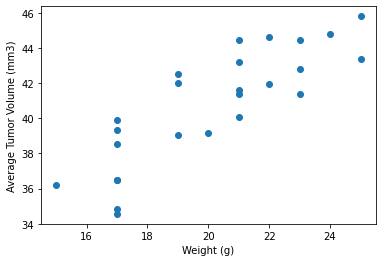

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_df = drug_results_df.loc[drug_results_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

Cap_avg_tumor = Capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = Capomulin_df["Weight (g)"].unique()

plt.scatter(mouse_weight, Cap_avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


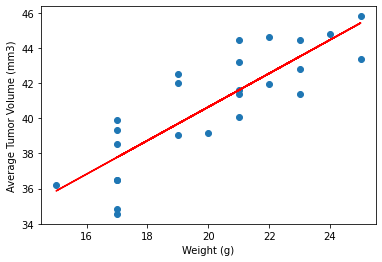

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

mouse_weight = mouse_weight.astype(float)

correlation = st.pearsonr(mouse_weight, Cap_avg_tumor)

(slope, intercept, rvalue, pvalue, std) = st.linregress(mouse_weight, Cap_avg_tumor)

rvalue = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, Cap_avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(mouse_weight, rvalue, "r-")

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.show()